In [77]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

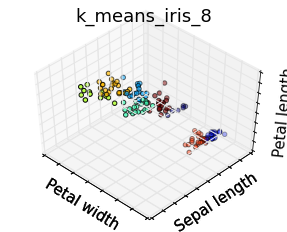

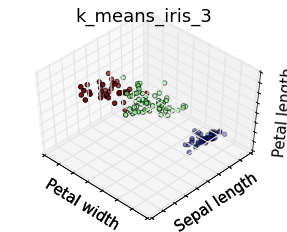

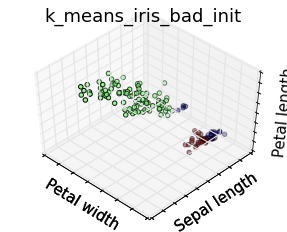

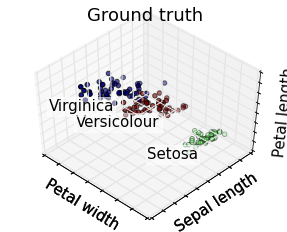

In [85]:
# http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets
np.random.seed(6)
centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = {'k_means_iris_3': KMeans(n_clusters=3),
              'k_means_iris_8': KMeans(n_clusters=8),
              'k_means_iris_bad_init': KMeans(n_clusters=3, n_init=1,
                                              init='random')}

fignum = 1
for name, est in estimators.items():
    fig = plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    plt.cla()
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float))

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(name)
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title("Ground truth");

# Clustering of numbers SELF
due to Petr Romov

In [2]:
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()

In [4]:
def show_digits(images):
    fig, ax = plt.subplots()
    ax.imshow(-np.hstack([img.reshape((8, 8)) for img in images]), cmap='gray', interpolation='none')
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)

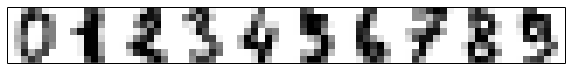

In [5]:
show_digits(digits.data[:10, :])

Cluster the images using [`KMeans`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). 
Try different methods for initialization and random seeds. The images in the dataset are ordered - you should discard this infomration by shuffling (hint: np.random.permutation)

Use the labels in digits.target to score the clustering quality with Adjusted Mutual Information и Adjusted Rand Index. [`sklearn.metrics.cluster`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics.cluster).

In [6]:
perm = np.random.permutation(len(digits.data))
X = digits.data[perm]
y = digits.target[perm]

In [7]:
from sklearn.cluster import KMeans
from sklearn import metrics
states = np.random.randint(1000, size=(30))
states[0] = -1
best = 0
best_model = None
best_result = None
for state in states:
    kmeans = KMeans(n_clusters=10, init="random", n_jobs=2, random_state=state) if state != -1 else KMeans(
                    n_clusters=10, init="k-means++", n_jobs=2, random_state=42)
    results = kmeans.fit_predict(X)
    AMI = metrics.adjusted_mutual_info_score(y, results)
    ARI = metrics.adjusted_rand_score(y, results)
    print "Model score: AMI = %s, ARI = %s" % (AMI, ARI)
    if AMI + ARI > best:
        best = AMI + ARI
        best_model = kmeans
        best_result = results

Model score: AMI = 0.736986065513, ARI = 0.668307323268
Model score: AMI = 0.738402924002, ARI = 0.66849899699
Model score: AMI = 0.736813674099, ARI = 0.665003855502
Model score: AMI = 0.736545610493, ARI = 0.666622202244
Model score: AMI = 0.734401827103, ARI = 0.666055375902
Model score: AMI = 0.737258429473, ARI = 0.666984276084
Model score: AMI = 0.728539654612, ARI = 0.655738666632
Model score: AMI = 0.732332313579, ARI = 0.660393277408
Model score: AMI = 0.736896249906, ARI = 0.667554650976
Model score: AMI = 0.732903602219, ARI = 0.663632714287
Model score: AMI = 0.740006250806, ARI = 0.671541537529
Model score: AMI = 0.739517026929, ARI = 0.668369973662
Model score: AMI = 0.731550660977, ARI = 0.659428066219
Model score: AMI = 0.733702306337, ARI = 0.664687910482
Model score: AMI = 0.721459149729, ARI = 0.631402586334
Model score: AMI = 0.736545610924, ARI = 0.666622202244
Model score: AMI = 0.737662269621, ARI = 0.670920995905
Model score: AMI = 0.732436113356, ARI = 0.664118

Draw the centroids of the best clustering.

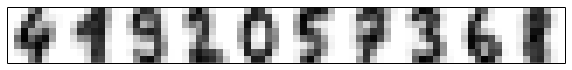

In [23]:
show_digits(best_model.cluster_centers_)

Was the separation ideal? Draw the confusion matrix (see example at http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#example-model-selection-plot-confusion-matrix-py )

In [9]:
from sklearn.metrics import confusion_matrix

In [61]:
the_confusion_matrix = confusion_matrix(y, best_result)

In [62]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(cm))
    plt.xticks(tick_marks, range(10), rotation=45)
    plt.yticks(tick_marks, range(10))
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Cluster id')

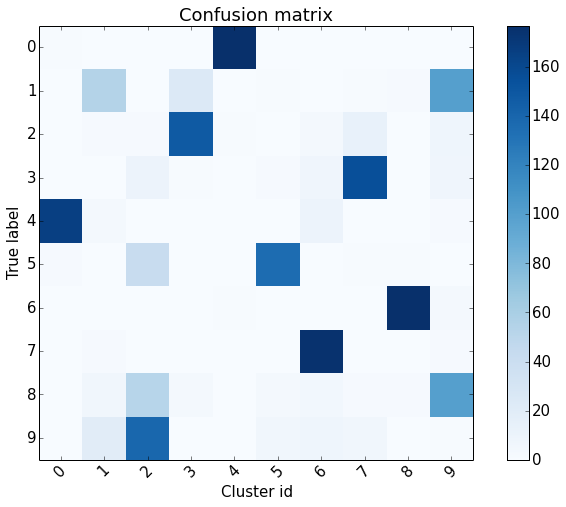

In [63]:
plot_confusion_matrix(tmp_confusion_matrix)